<a href="https://colab.research.google.com/github/ImanAyaz10/waste-classification-project-SA-AI/blob/main/weeek_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

week 11


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


Mounted at /content/drive


In [8]:
test_dir = "/content/drive/MyDrive/datasets/DATASET/dataset/DATASET/TEST"
model_path = "/content/drive/MyDrive/mobilenet_week10.h5"

if not os.path.exists(test_dir):
    raise FileNotFoundError("TEST directory not found.")

if not os.path.exists(model_path):
    raise FileNotFoundError("Trained model not found.")

print(" TEST directory:", test_dir)
print(" Model loaded from:", model_path)


 TEST directory: /content/drive/MyDrive/datasets/DATASET/dataset/DATASET/TEST
 Model loaded from: /content/drive/MyDrive/mobilenet_week10.h5


In [11]:
from PIL import Image
import os

test_dir = "/content/drive/MyDrive/datasets/DATASET/dataset/DATASET/TEST"

bad_images = []

for folder in os.listdir(test_dir):
    folder_path = os.path.join(test_dir, folder)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path)
            img.verify()
        except:
            bad_images.append(img_path)
            os.remove(img_path)

print("❌ Corrupted images removed:", len(bad_images))


❌ Corrupted images removed: 1


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_gen = ImageDataGenerator(rescale=1./255)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 2512 images belonging to 2 classes.


In [13]:
import numpy as np
import tensorflow as tf

model = tf.keras.models.load_model(model_path)

pred_probs = model.predict(test_data, verbose=1)
y_pred = (pred_probs > 0.5).astype(int).ravel()
y_true = test_data.classes


79/79 ━━━━━━━━━━━━━━━━━━━━ 58s 715ms/step


In [14]:
print("📊 Classification Report:\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=['Organic', 'Recyclable']
))


📊 Classification Report:

              precision    recall  f1-score   support

     Organic       0.87      0.97      0.92      1401
  Recyclable       0.96      0.81      0.88      1111

    accuracy                           0.90      2512
   macro avg       0.91      0.89      0.90      2512
weighted avg       0.91      0.90      0.90      2512



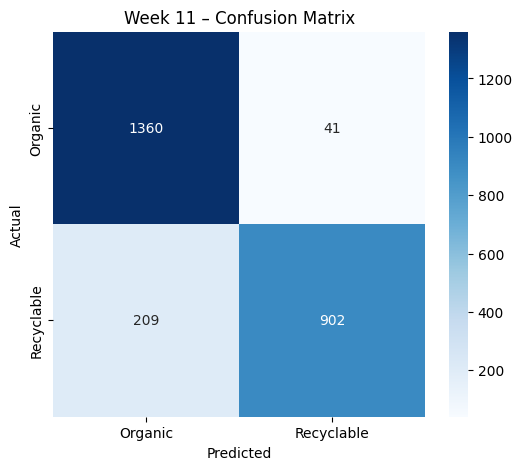

In [15]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Organic', 'Recyclable'],
            yticklabels=['Organic', 'Recyclable'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Week 11 – Confusion Matrix")
plt.show()


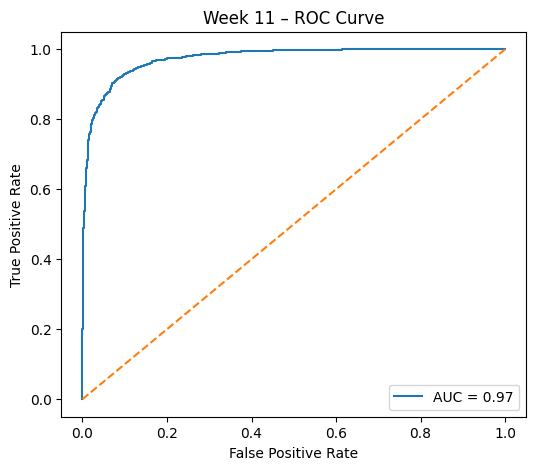

✅ ROC-AUC Score: 0.97412610640079


In [16]:
fpr, tpr, _ = roc_curve(y_true, pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc))
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Week 11 – ROC Curve")
plt.legend()
plt.show()

print("✅ ROC-AUC Score:", roc_auc)
